In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.pyplot as plt

## compare number of significant hits in pathways

In [2]:
path = '../Documents/metabo/dose_compare/' #all my files are here

In [42]:
df = pd.DataFrame(columns=['genotype','dose','pathway','sig_hits']) #setting up my dataframe
#df['dose'] = pd.to_numeric(df['dose'])

row = 0 #for use when I want to add new entry to df
for f in os.listdir(path):
    pathway_df = pd.read_csv(path + '/' + f, header=0, 
                             names=['pathway','pathway_total','hits_total','sig','ease','fet','gamma'])
    pathway_df['gamma'] = pd.to_numeric(pathway_df['gamma'])

    #adding information from individual pathway analysis files to one big dataframe
    for i in range(pathway_df.shape[0]):
        if pathway_df.iloc[i]['gamma'] <= 0.1:
            splitf = f.split('_')
            
            genotype = splitf[0]
            dose = splitf[2]
            pathway = pathway_df.iloc[i]['pathway']
            sig_hits = pathway_df.iloc[i]['sig']
            
            df.loc[row] = [genotype, dose, pathway, sig_hits]
            
            row += 1

In [43]:
df.head()

,genotype,dose,pathway,sig_hits
0,128,15,Arginine and proline metabolism,13
1,128,15,Aminoacyl-tRNA biosynthesis,11
2,128,15,D-Glutamine and D-glutamate metabolism,4
3,128,15,Tyrosine metabolism,7
4,128,15,D-Arginine and D-ornithine metabolism,3


C:\Users\Kevin Yang\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=18.5, pvalue=0.6234454525508315)


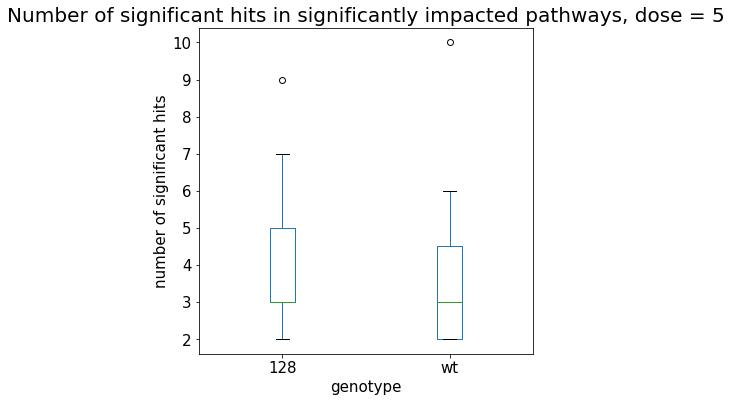

WilcoxonResult(statistic=22.0, pvalue=0.025334642331697268)


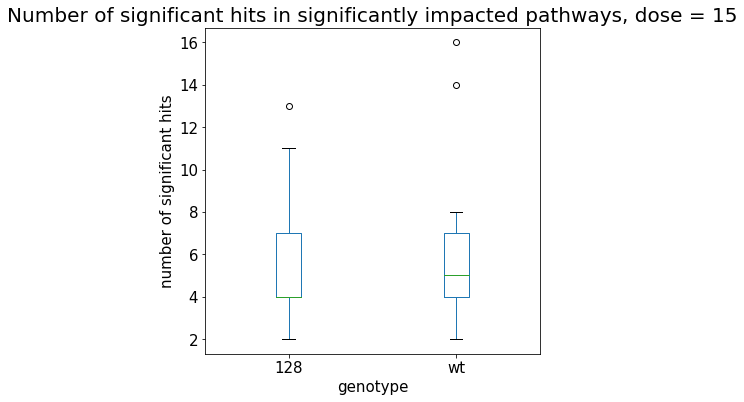

WilcoxonResult(statistic=21.0, pvalue=0.024789813193011406)


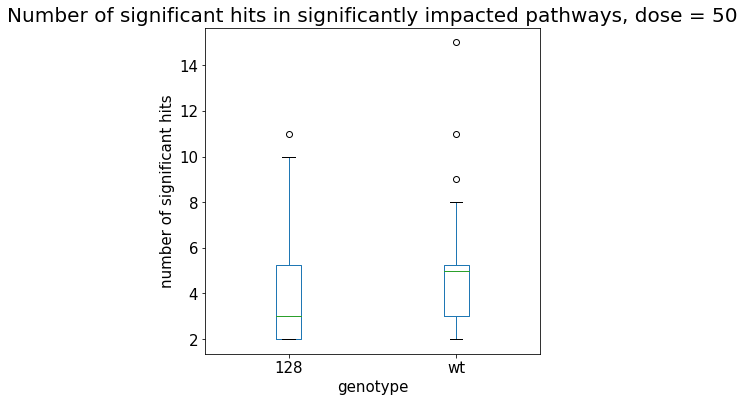

In [110]:
#examining dose response differences between 128 and wt
#for each pathway that is significant for both 128 and wt, see if number of significant hits is different 
for d in ['5', '15', '50']: 
    dose5df = df.loc[df['dose'] == d] #selecting rows of interest
    pathwaycol = dose5df['pathway'].unique() #extracting unique pathways present

    #dividing into different genotypes
    HD_df = dose5df.loc[dose5df['genotype'] == '128']
    wt_df = dose5df.loc[dose5df['genotype'] == 'wt']
    
    #making new df with significant hits from different genotypes for the pathways
    newdf = pd.DataFrame(pathwaycol, columns=['pathway'])
    newdf['128'] = np.nan
    newdf['wt'] = np.nan

    for i in range(HD_df.shape[0]):
        name = HD_df.iloc[i]['pathway']
        hits = HD_df.iloc[i]['sig_hits']
        ix = newdf.index[newdf['pathway'] == name]
        newdf.at[ix, '128'] = hits
    for i in range(wt_df.shape[0]):
        name = wt_df.iloc[i]['pathway']
        hits = wt_df.iloc[i]['sig_hits']
        ix = newdf.index[newdf['pathway'] == name]
        newdf.at[ix, 'wt'] = hits
        
    newdf = newdf.dropna() #removing rows with nan
    #print(newdf)
    print(wilcoxon(newdf['128'], newdf['wt'])) #performing wilcoxon signed rank test
    
    #plot box and whisker plot
    plt.figure(figsize=(6, 6))
    newdf.boxplot(['128','wt'], grid=False, fontsize=15)
    plt.xlabel('genotype', fontsize=15)
    plt.ylabel('number of significant hits', fontsize=15)
    plt.title('Number of significant hits in significantly impacted pathways, dose = ' + d, fontsize=20)
    plt.show()